In [1]:
import numpy as np
import matplotlib.pyplot as plt
from generic_scripts.nlk import Wire, NLK
import pandas as pd
from matplotlib.ticker import LogFormatter 
# plt.style.use(['notebook'])
# plt.rcParams.update({
#     'font.size': 18, 'lines.linewidth': 2,
#     'axes.grid': True, 'grid.alpha': 0.5, 'grid.linestyle': '--',
#     'text.usetex': True})
save_path = '/home/jucelio/notebooks/figures/nlk/'

# Testing methods (Wire)

In [75]:
wire = Wire(current=100)

x_space = np.linspace(-2.5, 2.5, num=25)[None, :]*1e-3
y_space = np.linspace(-2.5, 2.5, num=25)[None, :]*1e-3

xmesh, ymesh = np.meshgrid(x_space, y_space)

xrav = xmesh.ravel()[None, :]
yrav = ymesh.ravel()[None, :]

xpos = wire.position[0]
ypos = wire.position[1]

wire_radius = 0.59e-3
mask = (xrav - xpos)**2 + (yrav - ypos)**2 > (wire_radius)**2

r = np.vstack([xrav[mask], yrav[mask]])
wire_field = wire.calc_magnetic_field(r)

mag = np.hypot(wire_field[0], wire_field[1])
u_norm, v_norm =  wire_field[0, :]/mag, wire_field[1, :]/mag

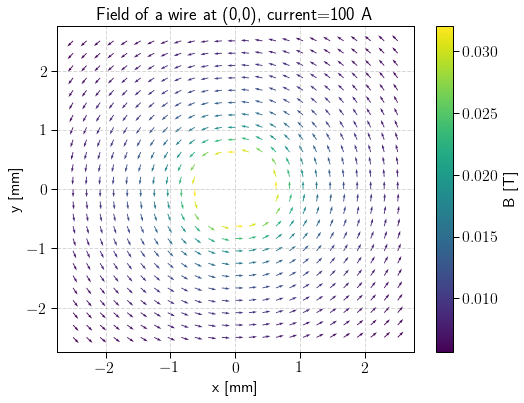

In [53]:
# plt.quiver(r[0,:]*1e3, r[1,:]*1e3, wire_field[0, :], wire_field[1, :], mag, units='x', pivot='tip')
plt.quiver(r[0,:]*1e3, r[1,:]*1e3, u_norm, v_norm, mag, units='width', pivot='tail',cmap='viridis')
plt.title("Field of a wire at (0,0), current=100 A", fontsize=18)
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.colorbar(label='B [T]')
plt.savefig(save_path+'wire_field.png', transparent=False, facecolor='white', dpi=150)


# Testing methods (NLK)

In [80]:
nlk = NLK()

In [32]:
nlk.wires

In [81]:
x_space = np.linspace(-12, 12, num=30)[None, :]*1e-3
y_space = np.linspace(-8, 8, num=30)[None, :]*1e-3
xmesh, ymesh = np.meshgrid(x_space, y_space)
xrav = xmesh.ravel()[None, :]
yrav = ymesh.ravel()[None, :]
xpos = nlk.positions[0]
ypos = nlk.positions[1]
mask = np.ones(xrav.shape, dtype=bool)
for i in range(xpos.size):
    mask *= (xrav - xpos[i])**2 + (yrav - ypos[i])**2 > (wire_radius)**2
r = np.vstack([xrav[mask], yrav[mask]])
r.shape
nlk_field = nlk.calc_magnetic_field(r)
mag = np.hypot(nlk_field[0], nlk_field[1])
u_norm, v_norm =  nlk_field[0, :]/mag, nlk_field[1, :]/mag

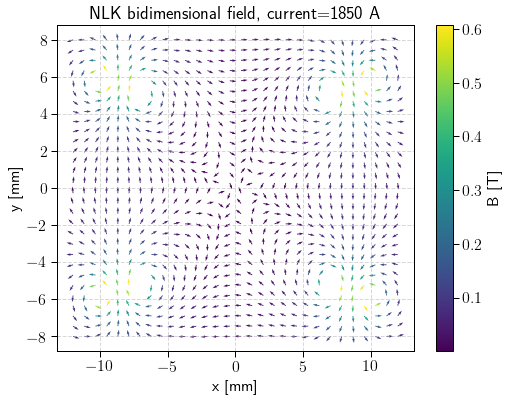

In [83]:
plt.quiver(r[0,:]*1e3, r[1,:]*1e3, u_norm, v_norm, mag, units='width', pivot='tail',cmap='viridis')
plt.title("NLK bidimensional field, current=1850 A", fontsize=18)
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.colorbar(label='B [T]')
plt.savefig(save_path+'nlk_field.png', transparent=False, facecolor='white', dpi=150)

Log field

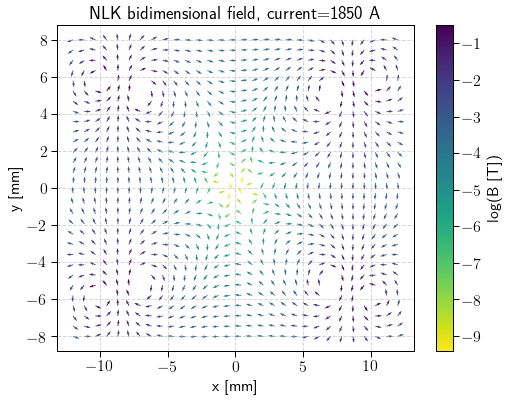

In [85]:
plt.quiver(r[0,:]*1e3, r[1,:]*1e3, u_norm, v_norm, np.log(mag), units='width', pivot='tail',cmap='viridis_r')
plt.title("NLK bidimensional field, current=1850 A", fontsize=18)
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.colorbar(label='log(B [T])')
plt.savefig(save_path+'nlk_field_log.png', transparent=False, facecolor='white', dpi=150)

## NLK profile

Loading NLK profile from project data

In [10]:
data = pd.read_csv('auxiliar_scripts/nlk_profile.txt', delimiter='\t', decimal=',', header=None, dtype='float')

In [11]:
data_nmp = data.to_numpy()

In [12]:
x_proj, field_proj = data_nmp[:, 0], data_nmp[:, 1]

Computing the field from the model without and with errors

In [13]:
nlk = NLK()
x, field = nlk.get_vertical_magnetic_field()
default_positions = nlk.positions
error = np.random.normal(0, 2e-4, default_positions.shape)
nlk.positions = nlk.positions + error
_, field_w_errors = nlk.get_vertical_magnetic_field()

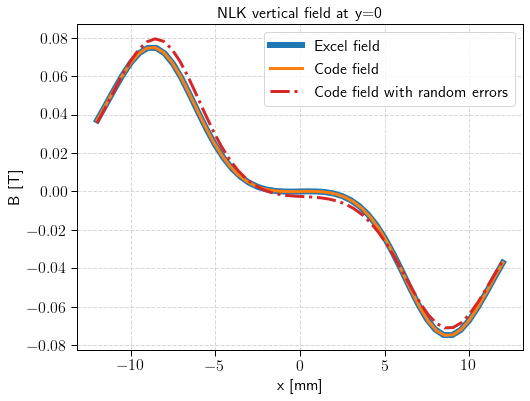

In [14]:
fig, ax = plt.subplots()
ax.plot(x_proj, field_proj/10000, label='Excel field', lw=6, c = 'tab:blue')
ax.plot(x*1e3, field, label = 'Code field', ls='-', lw=3 , c = 'tab:orange')
ax.plot(x*1e3, field_w_errors, label= "Code field with random errors", lw=3, ls='-.', c='tab:red')
ax.set_ylabel('B [T]')
ax.set_xlabel('x [mm]')
ax.set_title(r'NLK vertical field at y=0')
plt.legend()
plt.savefig('figures/nlk/nlk_noerrors.jpeg', dpi=160)
plt.show()

In [2]:
nlk = NLK()

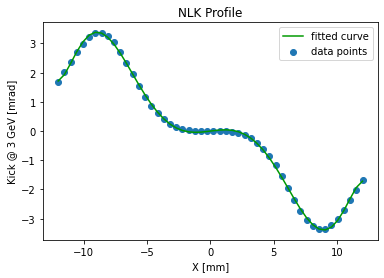

In [3]:
# monomials = np.array([1, 3, 5])
x, integ_field, kickx, polynom_b = NLK.si_nlk_kick(plot_flag=True, fit_monomials=None)

In [4]:
x, integ_field, kickx, polynom_b = NLK.si_nlk_kick(plot_flag=False)

In [16]:
%matplotlib qt5

In [17]:

with plt.style.context(['science']):
    plt.plot(x*1e3, kickx*1e3)
    plt.axvline(-8.6, ls='dotted', c='k', label='Dyn. apert. limit')
    plt.axvline(-8.5, ls='--', c='k', label='NLK best point of injection')
    plt.legend()